In [8]:
import sys
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

sys.path.insert(1, '../src/')
pd.set_option("display.max_columns", 999)

import models
import plots
import utils
import grafo_regular

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Erdos-Renyi

In [126]:
gr = models.ModeloVotante(
    
        n_actors = 6,
        influence_mode = 'erdos_renyi',
        connection_probability = 0.5,
        possible_opinions = [-1,1], 
        opinions_probabilities = [5/10,5/10],
        randomize_start_opinions= True,

    )



gr.actors_influencers

{'actor_1': {'is_bot': False,
  'influencers': ['actor_2', 'actor_3', 'actor_6']},
 'actor_2': {'is_bot': False, 'influencers': ['actor_1', 'actor_3']},
 'actor_3': {'is_bot': False,
  'influencers': ['actor_1', 'actor_2', 'actor_4']},
 'actor_4': {'is_bot': False, 'influencers': ['actor_3', 'actor_6']},
 'actor_5': {'is_bot': False, 'influencers': []},
 'actor_6': {'is_bot': False, 'influencers': ['actor_1', 'actor_4']}}

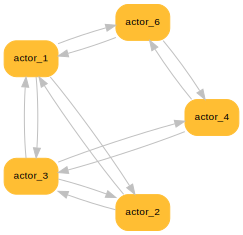

In [127]:
gr.make_graph()

In [143]:
gr.D()

influencers
actor_1    3
actor_2    2
actor_3    3
actor_4    2
actor_6    2
dtype: int64

In [144]:
gr.D('actor_1')

3

# Watts Strogatz

In [171]:
gr = models.ModeloVotante(
    
        n_actors = 10,
        influence_mode = 'watts_strogatz',
        connection_probability = 0.5,
        k = 0,
        possible_opinions = [-1,1], 
        opinions_probabilities = [5/10,5/10],
        randomize_start_opinions= True,

    )



gr.actors_influencers

{'actor_1': {'is_bot': False,
  'influencers': ['actor_3', 'actor_2', 'actor_10', 'actor_9']},
 'actor_2': {'is_bot': False,
  'influencers': ['actor_4', 'actor_3', 'actor_1', 'actor_10']},
 'actor_3': {'is_bot': False,
  'influencers': ['actor_5', 'actor_4', 'actor_2', 'actor_1']},
 'actor_4': {'is_bot': False,
  'influencers': ['actor_6', 'actor_5', 'actor_3', 'actor_2']},
 'actor_5': {'is_bot': False,
  'influencers': ['actor_7', 'actor_6', 'actor_4', 'actor_3']},
 'actor_6': {'is_bot': False,
  'influencers': ['actor_8', 'actor_7', 'actor_5', 'actor_4']},
 'actor_7': {'is_bot': False,
  'influencers': ['actor_9', 'actor_8', 'actor_6', 'actor_5']},
 'actor_8': {'is_bot': False,
  'influencers': ['actor_10', 'actor_9', 'actor_7', 'actor_6']},
 'actor_9': {'is_bot': False,
  'influencers': ['actor_1', 'actor_10', 'actor_8', 'actor_7']},
 'actor_10': {'is_bot': False,
  'influencers': ['actor_2', 'actor_1', 'actor_9', 'actor_8']}}

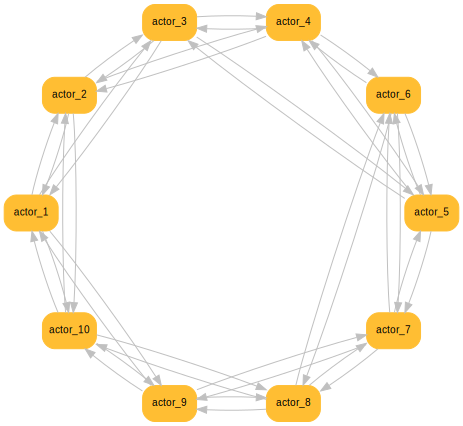

In [167]:
gr.make_graph()

In [170]:
gr.D()

influencers
actor_1     4
actor_10    4
actor_2     4
actor_3     4
actor_4     4
actor_5     4
actor_6     4
actor_7     4
actor_8     4
actor_9     4
dtype: int64

In [ ]:
gr.c()

In [ ]:
gr.C()

In [180]:
gr = models.ModeloVotante(
    
        n_actors = 10,
        influence_mode = 'watts_strogatz',
        connection_probability = 0.5,
        k = 0.2,
        possible_opinions = [-1,1], 
        opinions_probabilities = [5/10,5/10],
        randomize_start_opinions= True,

    )



gr.actors_influencers

{'actor_1': {'is_bot': False,
  'influencers': ['actor_3', 'actor_2', 'actor_10', 'actor_9']},
 'actor_2': {'is_bot': False,
  'influencers': ['actor_4', 'actor_3', 'actor_1', 'actor_10']},
 'actor_3': {'is_bot': False,
  'influencers': ['actor_5', 'actor_4', 'actor_2', 'actor_1']},
 'actor_4': {'is_bot': False,
  'influencers': ['actor_6', 'actor_5', 'actor_3', 'actor_2']},
 'actor_5': {'is_bot': False,
  'influencers': ['actor_7', 'actor_6', 'actor_4', 'actor_3']},
 'actor_6': {'is_bot': False,
  'influencers': ['actor_8', 'actor_7', 'actor_5', 'actor_4']},
 'actor_7': {'is_bot': False,
  'influencers': ['actor_9', 'actor_8', 'actor_6', 'actor_5']},
 'actor_8': {'is_bot': False,
  'influencers': ['actor_10', 'actor_9', 'actor_7', 'actor_6']},
 'actor_9': {'is_bot': False,
  'influencers': ['actor_1', 'actor_10', 'actor_8', 'actor_7']},
 'actor_10': {'is_bot': False,
  'influencers': ['actor_2', 'actor_1', 'actor_9', 'actor_8']}}

In [179]:
actors_influencers =  gr.actors_influencers
connection_probability = 0.2

for actor in actors_influencers.keys():
    for influencer in actors_influencers[actor]['influencers']:
        if random.uniform(0, 1) <=  connection_probability:
            print(actor, influencer)
        else: continue

actor_2 actor_1
actor_3 actor_1
actor_4 actor_5
actor_4 actor_2
actor_6 actor_5
actor_10 actor_9


In [194]:
aa = gr.infl.T.stack().reset_index().drop('level_1', axis = 1).rename(columns = {'level_0': 'actor', 0: 'influencer'})
aa

,actor,influencer
0,actor_1,actor_3
1,actor_1,actor_2
2,actor_1,actor_10
3,actor_1,actor_9
4,actor_2,actor_4
5,actor_2,actor_3
6,actor_2,actor_1
7,actor_2,actor_10
8,actor_3,actor_5
9,actor_3,actor_4


In [155]:
a = ['actor_1', 'actor_2', 'actor_3', 'actor_4', 'actor_5', 'actor_6']

np.array([np.roll(np.array(a), k_) for k_ in range(-2,2+1) if k_ != 0])[:,0].tolist()

    

['actor_3', 'actor_2', 'actor_6', 'actor_5']

In [147]:
np.roll(np.array(a),2)

array(['actor_5', 'actor_6', 'actor_1', 'actor_2', 'actor_3', 'actor_4'],
      dtype='<U7')

In [100]:
a.reset_index().pivot(columns = 'influencers', index = 'index', values = 'count')

influencers,actor_2,actor_3,actor_4,actor_5,actor_6
index,,,,,
actor_2,NaN,NaN,NaN,NaN,1.0
actor_3,NaN,NaN,NaN,1.0,1.0
actor_4,NaN,NaN,NaN,1.0,NaN
actor_5,NaN,1.0,1.0,NaN,1.0
actor_6,1.0,1.0,NaN,1.0,NaN


In [29]:
import random
random.uniform(0, 1)

0.5059864893433624

In [52]:
a = gr.actors_influencers.fillna(0).add(gr.actors_influencers.T.fillna(0))
a

,actor_1,actor_2,actor_3,actor_4,actor_5,actor_6
actor_1,0,1,1,0,1,0
actor_2,1,0,1,1,1,1
actor_3,1,1,0,1,0,1
actor_4,0,1,1,0,0,0
actor_5,1,1,0,0,0,0
actor_6,0,1,1,0,0,0


In [51]:
a+b

,actor_1,actor_2,actor_3,actor_4,actor_5,actor_6
actor_1,0,1,1,0,1,0
actor_2,1,0,1,1,1,1
actor_3,1,1,0,1,0,1
actor_4,0,1,1,0,0,0
actor_5,1,1,0,0,0,0
actor_6,0,1,1,0,0,0


In [55]:
a = pd.DataFrame([[0,1],[0,2]])
b = pd.DataFrame([[0,1],[1,0]])

In [56]:
a+b

,0,1
0,0,2
1,1,2


In [57]:
a

,0,1
0,0,1
1,0,2


In [60]:
a.sum()

0    0
1    3
dtype: int64

In [69]:
np.roll(np.array([1,2,3]), 1)

array([3, 1, 2])